# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>


## Exercise 12

The aim of this exercise is to apply **machine learning** to the recognition of images, specifically of **handwritten digits**, creating **deep neural networks** (DNN) and **convolutional neural networks** (CNN) through the **Keras** library.
To do this, I made use of the **MNIST dataset**, with its 70000  handwritten digits, to train and test the Neural Networks on.



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [ ]:
#Loading the MNIST dataset
from keras.datasets import mnist

#setting it

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


## Exercise 12.1

The first task is to create DNNs with *sequential* model and train them to recognise the images, testing them with different **optimisers**. I reported the tests on three different optimisers: **stocastic gradient descent** (SGD),  **Adadelta** and **Nadam**.

The DNNs I created are composed by an input layer with 400 neurons, a hidden layer with 100 neurons, both with *relu* activation function, a **dropout layer** and an output layer with *softmax* activation function.
Because this is a classification problem, the **loss function** chosen is the *cross-entropy* one.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

#Defining shortcuts

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(n): #n: if 1, optimise with SGD. If 2, optimise with Adadelta. If 3, optimise with Nadam.
    # create the model
    model=create_DNN()
    # compile the model
    if (n==1) :
      model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(), metrics=['accuracy'])
    if (n==2) :
      model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])
    if (n==3) :
      model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Nadam(), metrics=['accuracy'])
    if (n!=1 and n!=2 and n!=3)  :
      print ("Please insert a number between 1 and 3")
    return model
  

In [ ]:
# training parameters
batch_size = 32
epochs = 10

In [ ]:
# Model 1 (SGD)
model1 = compile_model(1)
history1 = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1197 - accuracy: 0.6616 - val_loss: 0.3028 - val_accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3886 - accuracy: 0.8892 - val_loss: 0.2340 - val_accuracy: 0.9324
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3176 - accuracy: 0.9101 - val_loss: 0.1969 - val_accuracy: 0.9421
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.9256 - val_loss: 0.1721 - val_accuracy: 0.9476
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2320 - accuracy: 0.9347 - val_loss: 0.1573 - val_accuracy: 0.9500
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2117 - accuracy: 0.9406 - val_loss: 0.1430 - val_accuracy: 0.9541
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1930 - accuracy: 0.9464 - val_loss: 0.1301 - val_accuracy:

In [ ]:
# Model 2 (Adadelta)
model2 = compile_model(2)
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3567 - accuracy: 0.1106 - val_loss: 2.1600 - val_accuracy: 0.3076
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.1631 - accuracy: 0.2356 - val_loss: 1.9859 - val_accuracy: 0.5035
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0040 - accuracy: 0.3581 - val_loss: 1.8202 - val_accuracy: 0.6247
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8499 - accuracy: 0.4499 - val_loss: 1.6627 - val_accuracy: 0.6911
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7145 - accuracy: 0.5162 - val_loss: 1.5167 - val_accuracy: 0.7304
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5953 - accuracy: 0.5583 - val_loss: 1.3853 - val_accuracy: 0.7571
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4812 - accuracy: 0.5926 - val_loss: 1.2687 - val_accura

In [ ]:

# Model 3 (Nadam)
model3 = compile_model(3)
history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4689 - accuracy: 0.8600 - val_loss: 0.1072 - val_accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1184 - accuracy: 0.9655 - val_loss: 0.0986 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0873 - accuracy: 0.9748 - val_loss: 0.0797 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0784 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0748 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0706 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.1015 - val_ac

SGD
Test loss: 0.1088804230093956
Test accuracy: 0.9653000235557556
*****************************************************
Adadelta
Test loss: 1.0009409189224243
Test accuracy: 0.8144999742507935
*****************************************************
Nadam
Test loss: 0.0973266214132309
Test accuracy: 0.980400025844574


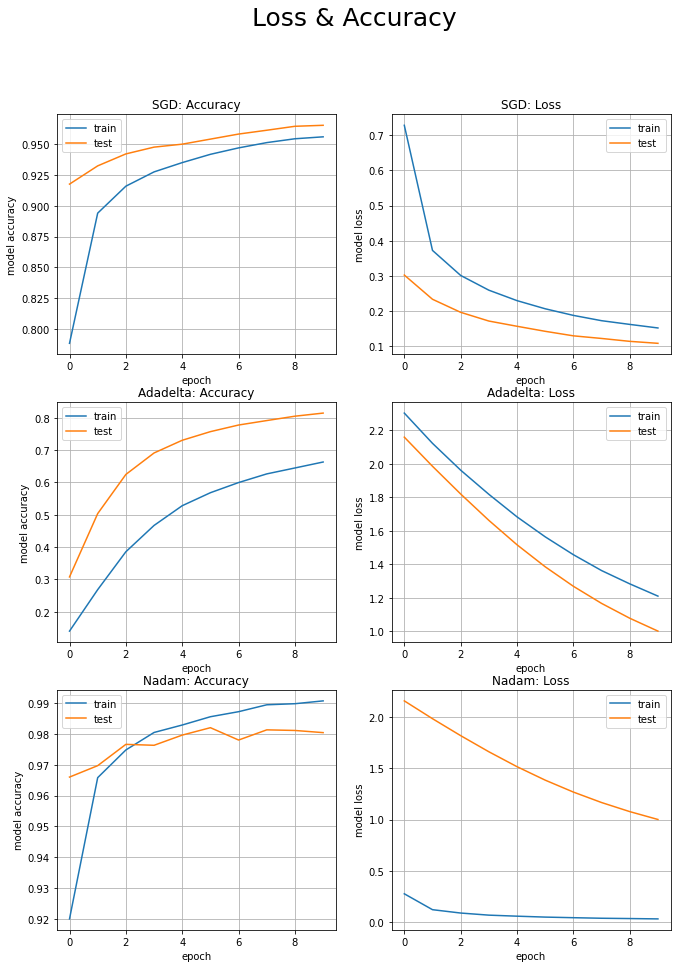

In [ ]:
# evaluate models & print performances
print ("SGD")
score1 = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
print("*****************************************************")
print ("Adadelta")
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
print("*****************************************************")
print ("Nadam")
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])



# Plot loss & accuracy
fig = plt.figure (figsize = (11, 15))
fig.suptitle ("Loss & Accuracy", fontsize=25)

plt.subplot (3, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("SGD: Accuracy")

plt.subplot (3, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("SGD: Loss")

plt.subplot (3, 2, 3)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("Adadelta: Accuracy")

plt.subplot (3, 2, 4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("Adadelta: Loss")

plt.subplot (3, 2, 5)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("Nadam: Accuracy")

plt.subplot (3, 2, 6)
plt.plot(history3.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.title ("Nadam: Loss")

plt.show()


SGD


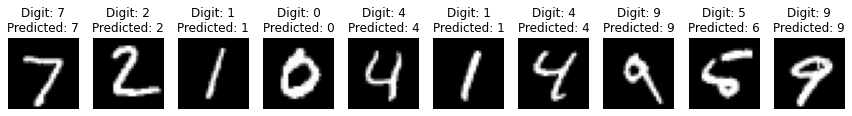

*******************************************************************************************************************************
Adadelta


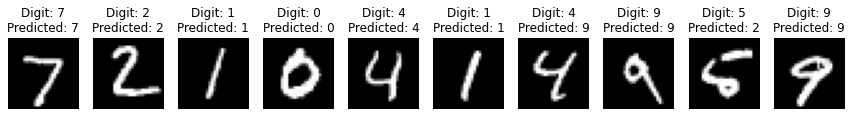

*******************************************************************************************************************************
Nadam


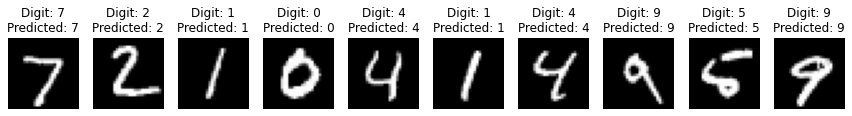

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model1.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print ("SGD")
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

print("*******************************************************************************************************************************")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model2.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print ("Adadelta")
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


print("*******************************************************************************************************************************")
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model3.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print ("Nadam")
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Of the three optimisers tried, **Adadelta** is the one giving the worst results: its accuracy is around $82\%$ and in the test it got 2 digits wrong, confusing the "5" with a "2" and the "4" with a "9".
  **SGD** behaves well. It has an accuracy that goes around $96.5\%$ and during the test it was able to recognise 9 digits out of 10, only mistaking the "5" for a "6".
 **Nadam** is the best optimiser among the ones I tried. It has an accuracy around $98\%$ and it is able to recognise all the digits (Adam reaches similar results as well).

## Exercise 12.2

The second task was to create a CNN and train it to recognise the images. The focus of the exercise was experimenting with the Network structure, adding different types of layers (convolutional, pooling, dropout...).
I decided to try two different architectures: 
- model 1:
  - one **convolutional layer** (10 filters, 5x5))
  - one **pooling layer** (2x2)
  - flatten
  - three dense **hidden layers** (200, 150, 100 neurons)
  - a dropout (0.5)
  - an **output layer** (10 neurons)

- model 2:
  - one **convolutional layer** (6 filters, 5x5)
  - one **pooling layer** (2x2)
  - another **convolutional layer** (16 filters, 3x3)
  - another **pooling layer** (2x2)
  - flatten
  - one dense **hidden layer** (150 neurons)
  - a dropout (0.5)
  - an **output layer** (10 neurons)

  All the neurons had *relu* as activation function (except for the output layer, activated bu *softmax*) and *Nadam* as optimiser.

In [ ]:
# libraries
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [ ]:
def create_CNN1():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(200,activation='relu'))
    model.add(Dense(150,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Nadam(), metrics=['accuracy'])
    return model

def create_CNN2():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(150,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Nadam(), metrics=['accuracy'])
    return model    



In [ ]:
model4 = create_CNN1()
model5 = create_CNN2 ()

model4.summary()
model5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 200)               288200    
_________________________________________________________________
dense_34 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)             

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
history4=model4.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4145 - accuracy: 0.8716 - val_loss: 0.0660 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0698 - accuracy: 0.9812 - val_loss: 0.0563 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0466 - accuracy: 0.9866 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0324 - accuracy: 0.9910 - val_loss: 0.0567 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0476 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0215 - accuracy: 0.9943 - val_loss: 0.0501 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0508 -

In [ ]:
history5=model5.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4973 - accuracy: 0.8424 - val_loss: 0.0611 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0765 - accuracy: 0.9773 - val_loss: 0.0376 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0361 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0275 -

In [ ]:
# evaluate models & print performances
print ("Model 1")
score1 = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
print("*****************************************************")
print ("Model 2")
score2 = model5.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model 1
Test loss: 0.09442200511693954
Test accuracy: 0.9872999787330627
*****************************************************
Model 2
Test loss: 0.03239462152123451
Test accuracy: 0.9914000034332275


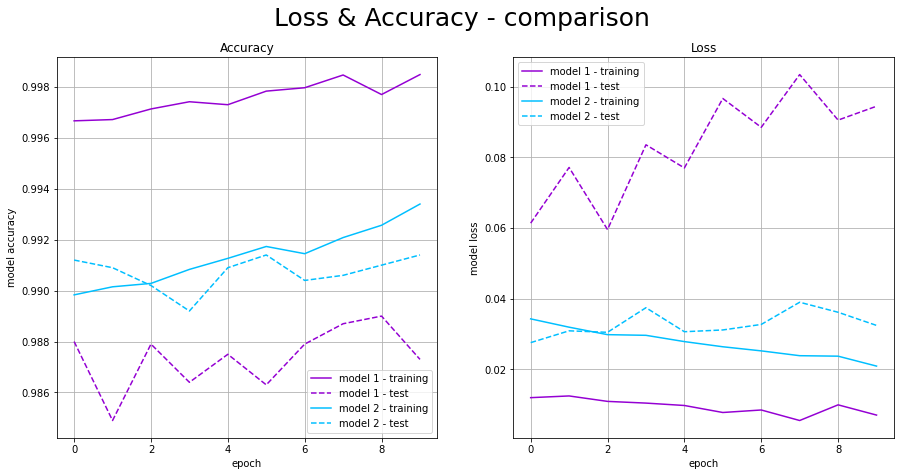

In [ ]:
# Plot loss & accuracy
fig = plt.figure (figsize = (15, 7))
fig.suptitle ("Loss & Accuracy - comparison", fontsize=25)

plt.subplot (1, 2, 1)
#Model 1
plt.plot(history4.history['accuracy'], color="darkviolet", label="model 1 - training")
plt.plot(history4.history['val_accuracy'], color="darkviolet", linestyle="dashed", label="model 1 - test")

plt.plot(history5.history['accuracy'], color="deepskyblue", label="model 2 - training")
plt.plot(history5.history['val_accuracy'], color="deepskyblue", linestyle="dashed", label="model 2 - test")

plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.title ("Accuracy")


plt.subplot (1, 2, 2)
#model 1
plt.plot(history4.history['loss'], color="darkviolet", label="model 1 - training")
plt.plot(history4.history['val_loss'], color="darkviolet", linestyle="dashed", label="model 1 - test")

plt.plot(history5.history['loss'], color="deepskyblue", label="model 2 - training")
plt.plot(history5.history['val_loss'], color="deepskyblue", linestyle="dashed", label="model 2 - test")

plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.title ("Loss")



plt.show()

Model 1


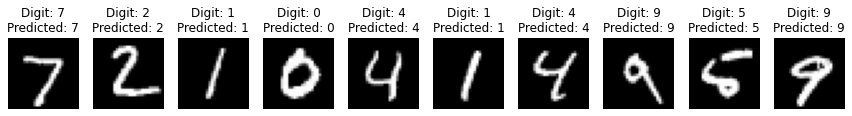

*******************************************************************************************************************************
Model 2


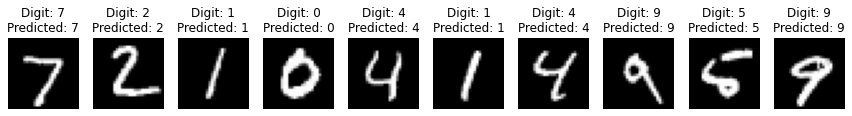

In [ ]:
#test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model4.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print ("Model 1")
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

print("*******************************************************************************************************************************")
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model5.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

print ("Model 2")
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


Both the architectures give excellent result, Model 1 having a $98.7\%$ accuracy and model 2 having a $99.1\%$ accuracy, and both being able to recognise all the digits.
Model 2 is slightly better, because of the higher accuracy, and also because it'a little faster in the training, taking about 31 seconds per epoch against the 36 seconds taken by Model 1.


## Exercise 12.3

This exercise asked to test our NNs on digits written by me, so a different dataset from the one it was trained on.
I decided to test the networks on two sets of digits, one written well and the other more quickly: this resulted in the digits being distorted, written not in the middle of the figure, or with different dimensions.

Blelow my results are reported.

In [ ]:
from google.colab import files
upload1 = files.upload()
upload2 = files.upload()
belli = []
brutti = []

for bl in upload1 :
  img = Image.open(bl).convert('L')
  belli.append(img)

for bt in upload2 :
  img = Image.open(bt).convert('L')
  brutti.append(img)

Saving 0_bello.png to 0_bello (2).png
Saving 1_bello.png to 1_bello (2).png
Saving 2_bello.png to 2_bello (2).png
Saving 3_bello.png to 3_bello (2).png
Saving 4_bello.png to 4_bello (2).png
Saving 5_bello.png to 5_bello (2).png
Saving 6_bello.png to 6_bello (2).png
Saving 7_bello.png to 7_bello (2).png
Saving 8_bello.png to 8_bello (2).png
Saving 9_bello.png to 9_bello (2).png


Saving 0_brutto.png to 0_brutto.png
Saving 1_brutto.png to 1_brutto.png
Saving 2_brutto.png to 2_brutto.png
Saving 3_brutto.png to 3_brutto.png
Saving 4_brutto.png to 4_brutto.png
Saving 5_brutto.png to 5_brutto.png
Saving 6_brutto.png to 6_brutto.png
Saving 7_brutto.png to 7_brutto.png
Saving 8_brutto.png to 8_brutto.png
Saving 9_brutto.png to 9_brutto.png


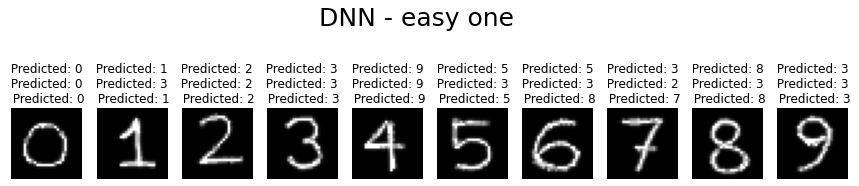

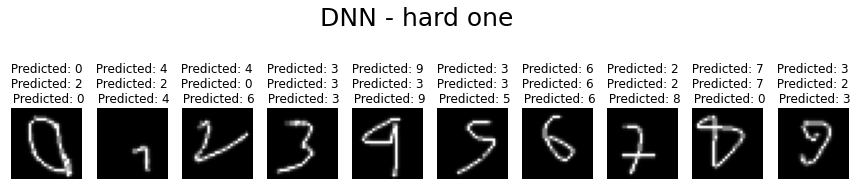

In [ ]:
from PIL import Image
import os
#DNN

#Belli
fig=plt.figure(figsize=(15, 7))
fig.suptitle("DNN - easy one", fontsize='25')

for k in range(10):
    
  pix=belli[k].load();
  data = np.zeros((28, 28))
  for j in range(28):
    for i in range(28):
      data[i,j]=pix[j,i]
  data /= 255
    
  data = data.reshape(1,28*28)
  pred1 = model1.predict(data)
  pred2 = model2.predict(data)
  pred3 = model3.predict(data)
  data = data.reshape(28,28)

  ax = plt.subplot(2, 10, k + 1)    
  plt.imshow(data, cmap='gray')    
  plt.title(" Predicted: {}".format(np.argmax(pred1)) + " \n Predicted: {}".format(np.argmax(pred2)) + " \n Predicted: {}".format(np.argmax(pred3))) 
  # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
  plt.axis('off') 

  #Brutti
fig=plt.figure(figsize=(15, 7))
fig.suptitle("DNN - hard one", fontsize='25')

for k in range(10):
    
  pix=brutti[k].load();
  data = np.zeros((28, 28))
  for j in range(28):
    for i in range(28):
      data[i,j]=pix[j,i]
  data /= 255
    
  data = data.reshape(1,28*28)
  pred1 = model1.predict(data)
  pred2 = model2.predict(data)
  pred3 = model3.predict(data)
  data = data.reshape(28,28)

  ax = plt.subplot(2, 10, k + 1)    
  plt.imshow(data, cmap='gray')    
  plt.title(" Predicted: {}".format(np.argmax(pred1)) + " \n Predicted: {}".format(np.argmax(pred2)) + " \n Predicted: {}".format(np.argmax(pred3))) 
  # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
  plt.axis('off') 


plt.show()

#### Deep Neural Network results
In the pictures above, the first line tells the predictions of *SGD*, the second line tells the predictions of *Adadelta* and the third line tells the predictions of *Nadam*.

- *SGD* got a score of 6/10 for the easy set and a score of 3/10 for the hard set.
- *Adadelta* got a score of 3/10 for the easy set and a score of 2/10 for the hard set.
- *Nadam* got a score of 7/10 for the easy set and a score of 4/10 for the hard set.

Although all the models got worse results compared with the previous test, their relative accuracy confirms the studies above.
Their poor performance is probably due the fact that my handwriting is different from the one the Network was trained on.


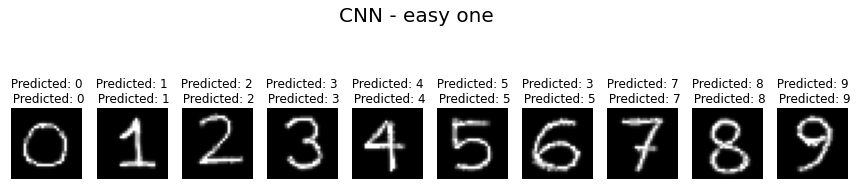

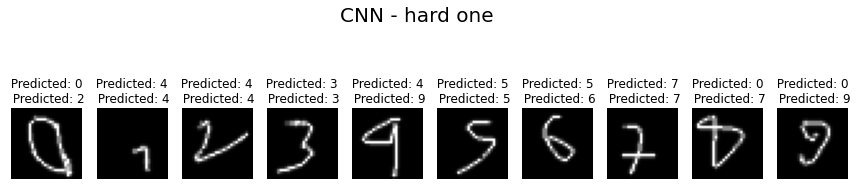

In [ ]:
fig=plt.figure(figsize=(15, 7))
fig.suptitle("CNN - easy one", fontsize='20')

for k in range (10):
  pix = belli[k].load();
  data = np.zeros((28, 28))
  for j in range(28):
    for i in range(28):
      data[i,j]=pix[j,i]
  data /= 255
    
  data = data.reshape(1, 28, 28, 1)

  pred4 = model4.predict(data)
  pred5 = model5.predict(data)

  data = data.reshape(28,28)

  ax = plt.subplot(2, 10, k + 1)    
  plt.imshow(data, cmap='gray')    
  plt.title(" Predicted: {}".format(np.argmax(pred4)) + " \n Predicted: {}".format(np.argmax(pred5)))
  # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
  plt.axis('off') 

fig=plt.figure(figsize=(15, 7))
fig.suptitle("CNN - hard one", fontsize='20')

for k in range (10):
  pix = brutti[k].load();
  data = np.zeros((28, 28))
  for j in range(28):
    for i in range(28):
      data[i,j]=pix[j,i]
  data /= 255
    
  data = data.reshape(1, 28, 28, 1)

  pred4 = model4.predict(data)
  pred5 = model5.predict(data)

  data = data.reshape(28,28)

  ax = plt.subplot(2, 10, k + 1)    
  plt.imshow(data, cmap='gray')    
  plt.title(" Predicted: {}".format(np.argmax(pred4)) + " \n Predicted: {}".format(np.argmax(pred5)))
  # plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
  plt.axis('off') 






plt.show()

#### Convolutional Neural Network results

In the pictures above, the first line tells the predictions of *Model 1* and the second line tells the predictions of *Model 2*.

- *Model 1* got a score of 9/10 for the easy set and a score of 5/10 for the hard set.
- *Model 2* got a score of 9/10 for the easy set and a score of 5/10 for the hard set.

The two models have the same score overall but they don't give the same results.
The scores confirm the fact that they are performing better than the DNN models. 